In [1]:
#Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
#Criando Dataframe
df = pd.read_excel('AdventureWorks.xlsx')

In [25]:
# Visualisando as 5 primeiras linhas
df.sample(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total,Lucro,Tempo Envio
673,2008-02-25,2008-03-03,199,384,18823,200802253CS578,348.58,758.00,5,189.50,3600.50,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,1742.90,1857.60,7
489,2009-01-03,2009-01-07,306,366,19060,200901033CS676,348.58,758.00,20,3032.00,12128.00,Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black,6971.60,5156.40,4
604,2009-02-14,2009-02-20,306,1155,19062,200902144CS737,324.69,980.00,8,548.80,7291.20,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,2597.52,4693.68,6
800,2009-12-31,2010-01-09,307,2497,19145,200912315CS735,5.09,9.99,1560,2337.66,13246.74,Headphone Adapter for Contoso Phone E130 White,"Contoso, Ltd",Contoso,Economy,White,7940.40,5306.34,9
215,2009-09-25,2009-10-05,307,366,19136,200909253CS726,348.58,758.00,18,0.00,13644.00,Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black,6274.44,7369.56,10


In [ ]:
# Quantidade de linhas e colunas
df.shape

In [ ]:
# Tipos de dados
df.dtypes

In [ ]:
# Receita total
df['Valor Venda'].sum()

In [13]:
# Gerar coluna de custo
df['Custo Total'] = df['Custo Unitário'].mul(df['Quantidade'])

In [15]:
# Geral coluna de lucro
df['Lucro'] = df['Valor Venda'] - df['Custo Total']

In [ ]:
# Lucro Total
round(df['Lucro'].sum(), 2)

In [22]:
# Criando coluna com o tempo total de envio

df['Tempo Envio'] = df['Data Envio'] - df['Data Venda']

In [24]:
# Extraindo apenas os dias do tempo total de envio
df['Tempo Envio'] = (df['Data Envio'] - df['Data Venda']).dt.days

In [26]:
# Médio do tempo de envio por marca
df.groupby('Marca')['Tempo Envio'].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo Envio, dtype: float64

In [ ]:
# Verificando se temos dados faltantes
df.isnull().sum()

In [33]:
# Agrupar por ano e por marca
df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [34]:
pd.options.display.float_format = '{:20,.2f}'.format

In [35]:
# Resetando Index
lucro_ano = df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [37]:
# Total de produtos vendidos
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

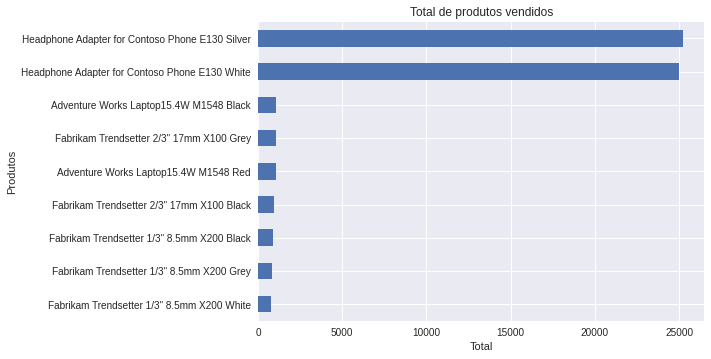

In [52]:
# Gráfico total de produtos vendidos
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=True).plot.barh(title='Total de produtos vendidos')
plt.xlabel("Total")
plt.ylabel("Produtos");

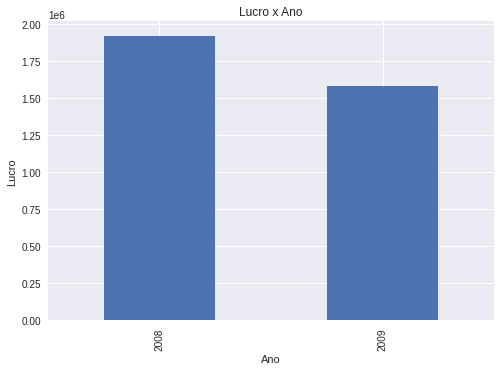

In [56]:
# Grafico Lucro x Ano
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum().plot.bar(title='Lucro x Ano')
plt.xlabel("Ano")
plt.ylabel("Lucro");

In [ ]:
# Selecionando vendas de 2009
df_2009 = df[df['Data Venda'].dt.year == 2009]

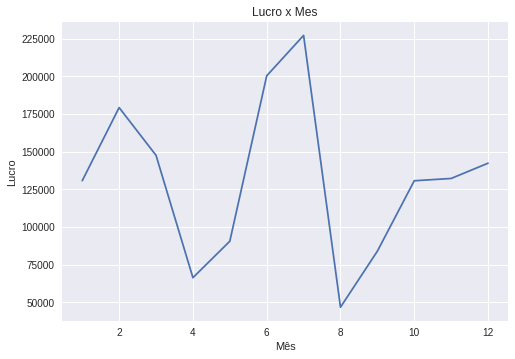

In [60]:
df_2009.groupby(df_2009['Data Venda'].dt.month)['Lucro'].sum().plot(title='Lucro x Mes')
plt.xlabel("Mês")
plt.ylabel("Lucro");

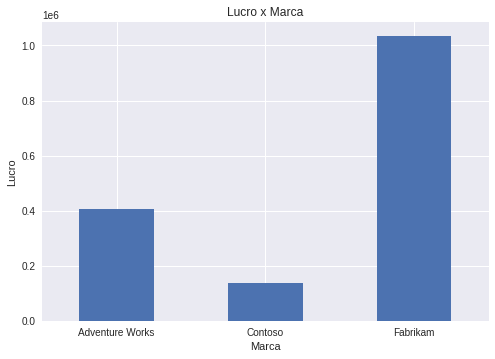

In [64]:
df_2009.groupby("Marca")['Lucro'].sum().plot.bar(title='Lucro x Marca')
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal");

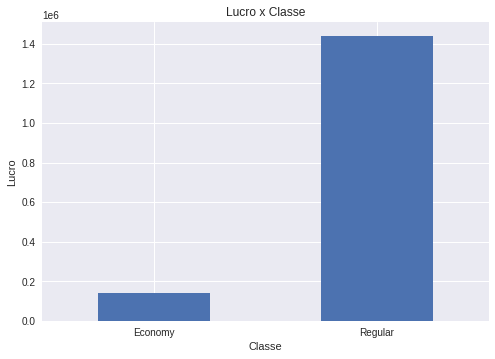

In [65]:
df_2009.groupby("Classe")['Lucro'].sum().plot.bar(title='Lucro x Classe')
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal");

In [66]:
df['Tempo Envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo Envio, dtype: float64

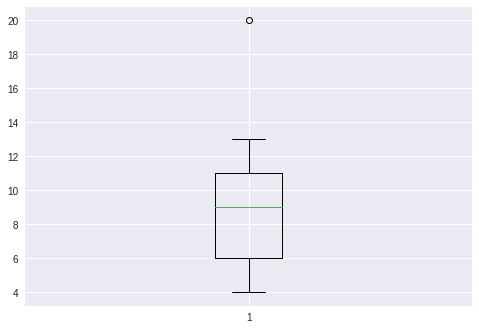

In [68]:
# Gráfico boxplot
plt.boxplot(df["Tempo Envio"]);

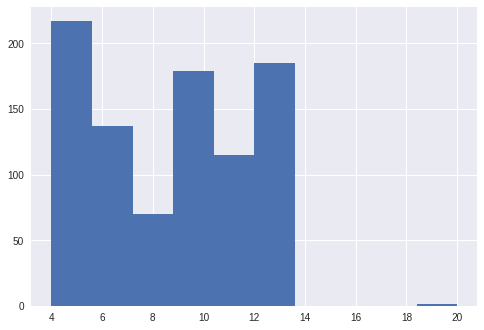

In [69]:
# Histograma
plt.hist(df["Tempo Envio"]);

In [70]:
# Tempo min de envio
df["Tempo Envio"].min()

4

In [71]:
# Tempo max de envio
df["Tempo Envio"].max()

20

In [ ]:
# Identificando o outlier

df[df["Tempo Envio"] == 20]

In [75]:
df.to_csv('df_vendas_novos.csv', index=False)